In [1]:
import json
#from bs4 import BeautifulSoup as bs
import itertools
import pprint
import matplotlib.pyplot as plt
import tqdm
import sklearn
import numpy as np
from sklearn.manifold import t_sne
import logging
import gensim
import re

In [3]:
fname = '../data/hlavnespravy.json'

In [4]:
def line_json(fname, bads=None):
    bads = []
    with open(fname) as f:
        for l in f:
            try:
                if l in ['[\n',']\n']:
                    continue
                data = json.loads(l.strip(',\n'))
                html = data['html']
                soup = bs(html, 'lxml')
                yield soup
            except KeyboardInterrupt:
                raise
            except Exception as e:
                bads.append(l)
                print(':(', len(bads))
                pass

In [5]:
def parse_hlavne_spravy(soup):
    h3 = soup.select('h3')[0]
    title = h3.text
    article = x.select('.article-content')[0]
    for script in article.select('script'):
        script.decompose()
    text = article.text.strip('\n')
    return {'title': title, 'body':text}

In [77]:
parsed = []
sad = []
for x in tqdm.tqdm_notebook(line_json(fname, sad)):
    try:
        parsed.append(parse_hlavne_spravy(x))
    except KeyboardInterrupt:
        raise
    except Exception as e:
        sad.append(x)
        print (':-(', len(sad))


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

:( 1


In [6]:
phs_fname = '../data/parsed_hlavne_spravy.json'
if False:
    with open(phs_fname, 'w') as f:
        json.dump(parsed, f)

In [7]:
data = json.load(open(phs_fname))

In [72]:
def filter_chars(w):
    return ''.join([x for x in w if x not in '.,!:#$"-'])

In [74]:
titles = [[filter_chars(y) for y in x['title'].lower().split(' ')] for x in data]

(array([1.4632e+04, 8.2090e+04, 7.9690e+03, 8.2800e+02, 6.8000e+01,
        1.4000e+01, 2.0000e+00]),
 array([ 1.,  8., 15., 22., 29., 36., 43., 50.]),
 <a list of 7 Patch objects>)

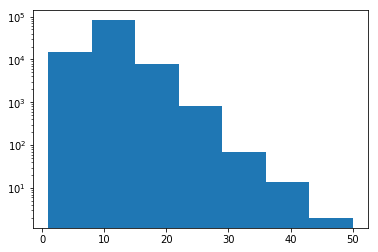

In [76]:
plt.hist([len(x) for x in titles], log=True, bins=7)

In [77]:
dic = gensim.corpora.Dictionary(titles)

In [78]:
kv = [(dic[idd], v) for idd, v in dic.dfs.items()]
kv = sorted(kv, key=lambda x:x[1])

In [79]:
w2v = gensim.models.word2vec.Word2Vec(titles, size=100)

In [81]:
words = sorted(dic.token2id.keys())
vectors = [w2v[x] for x in words if x in w2v]
vectors = np.vstack(vectors)
words = [x for x in words if x in w2v]
ids = [dic.token2id[x] for x in words if x in w2v]

/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
/home/vlejd/.virtualenvs/diplomka/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """


In [83]:
tsne = t_sne.TSNE(verbose=10)
reduced = tsne.fit_transform(vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 24160 samples in 0.117s...
[t-SNE] Computed neighbors for 24160 samples in 87.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24160
[t-SNE] Computed conditional probabilities for sample 2000 / 24160
[t-SNE] Computed conditional probabilities for sample 3000 / 24160
[t-SNE] Computed conditional probabilities for sample 4000 / 24160
[t-SNE] Computed conditional probabilities for sample 5000 / 24160
[t-SNE] Computed conditional probabilities for sample 6000 / 24160
[t-SNE] Computed conditional probabilities for sample 7000 / 24160
[t-SNE] Computed conditional probabilities for sample 8000 / 24160
[t-SNE] Computed conditional probabilities for sample 9000 / 24160
[t-SNE] Computed conditional probabilities for sample 10000 / 24160
[t-SNE] Computed conditional probabilities for sample 11000 / 24160
[t-SNE] Computed conditional probabilities for sample 12000 / 24160
[t-SNE] Computed conditional probabilities for sa

In [84]:
len(words)

24160

In [85]:
len(vectors)

24160

In [45]:
nchosen = 100
chosen = np.random.choice(range(len(words)), size=nchosen)
cwords = [words[x] for x in chosen]
cpoz = [reduced[x] for x in chosen]

In [86]:
nchosen = 200
diff = 7
chosen = [0]
sids = sorted(range(len(ids)), key=lambda x: dic.dfs[ids[x]])
for i in sids:
    mindif = 999999
    for o in chosen:
        dist = np.linalg.norm(reduced[o]-reduced[i])
        mindif = min(mindif, dist)
    if mindif > diff:
        chosen.append(i)
        print(len(chosen))
    if len(chosen)>nchosen:
        break

cwords = [words[x] for x in chosen]
cpoz = [reduced[x] for x in chosen]

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


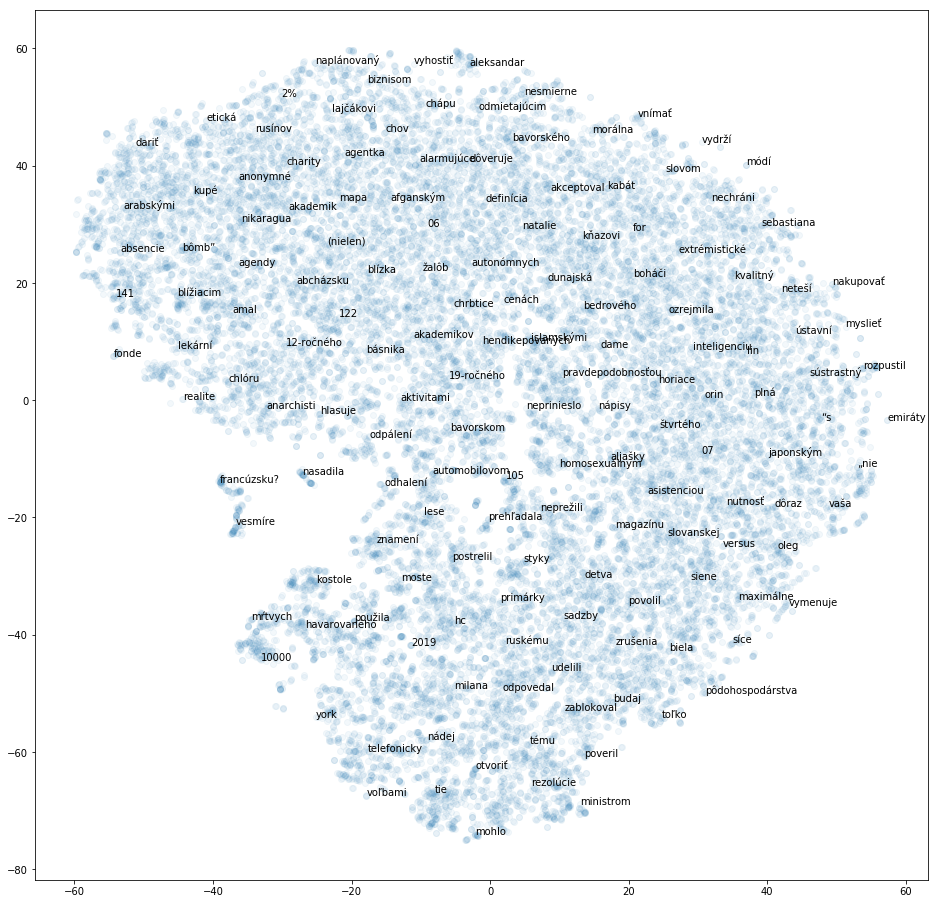

In [87]:
fig = plt.figure(figsize=(16,16))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.05)
for i in range(len(cpoz)):
    plt.text(cpoz[i][0], cpoz[i][1], cwords[i])

In [21]:
reduced[:100, 0]

array([-2.37878685e+01,  2.12057571e+01, -2.12999382e+01,  3.01190338e+01,
       -7.81065226e+00,  5.92414260e-01, -5.61819344e+01, -3.83074341e+01,
        3.20698128e+01, -2.80705585e+01,  1.58258667e+01, -1.21969533e+00,
        2.44797955e+01, -2.80217838e+01,  2.23249531e+01, -3.19412804e+01,
       -4.73249245e+01,  8.46183658e-01, -3.83502846e+01,  3.06473808e+01,
        4.74415207e+01, -1.21264496e+01, -1.21062870e+01, -3.82909737e+01,
        9.17638719e-01,  1.03922653e+01,  7.44475222e+00,  1.39656382e+01,
        1.03677340e+01,  7.07335663e+00,  7.37894917e+00,  1.48288977e+00,
       -2.08702564e+01, -3.00156441e+01, -3.86018257e+01, -5.35786018e+01,
       -1.02007461e+00, -3.77616692e+01, -3.86245766e+01,  2.31649036e+01,
       -1.87433681e+01, -3.80704079e+01, -1.79000263e+01, -2.55105209e+01,
       -3.22220802e+01,  2.11054664e-02,  1.80304602e-01, -2.84730339e+01,
       -1.50302258e+01, -3.59657249e+01, -2.13118801e+01, -1.93161755e+01,
        2.72537756e+00, -